In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors
import math
import sympy
from sympy import sieve, prime


In [27]:
def isPowerOfTwo(n):
    return (n and (not(n & (n - 1))) )

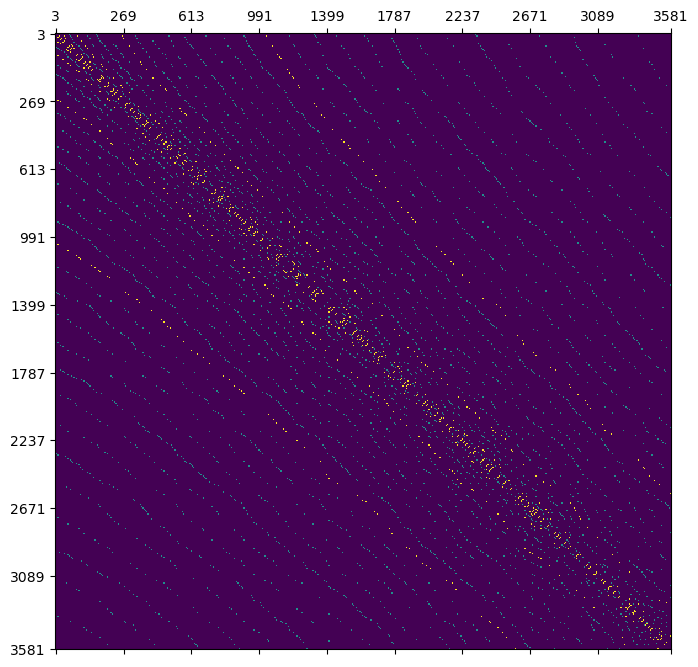

In [36]:
matrix_size = 500
matrix = np.zeros((matrix_size, matrix_size))
primes = sympy.primerange(3, 7000) #7000
prime_list=list(primes)
prime_list.reverse()

l = len(prime_list)
for i, p in enumerate(prime_list):
    if i < l - 1:
        prime_sublist = prime_list[i+1:]
        for j, q in enumerate(prime_sublist):
            #print("{0}-{1}".format(p,q))
            idx_p = sieve.search(p)[0]-2
            idx_q = sieve.search(q)[0]-2
            if idx_p < matrix_size and idx_q < matrix_size:
                d = p-q
                sqrt_num = math.sqrt(d)
                if sqrt_num.is_integer():
                    # 8 -> yellow
                    # 4 -> blue
                    val = 8 if isPowerOfTwo(d) else 4
                    matrix[idx_p,idx_q] = val
                    matrix[idx_q,idx_p] = val

max_prime = prime(matrix_size+2)
axis_labels = list(enumerate(sieve.primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
matrix_plot = ax.matshow(matrix, interpolation='nearest')
#fig.colorbar(matrix_plot)
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels)
plt.show()

